In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from pyramid.arima import auto_arima

from Sloth.Sloth import Sloth
Sloth = Sloth()

In [25]:
# read in different datasets

# electronic production data
data_electronic = pd.read_csv("datasets/Electronic_Production.csv",index_col=0)
data_electronic.index = pd.to_datetime(data_electronic.index)

# Beijing temperature data
data_temp = pd.read_csv("datasets/PRSA_data_2010.1.1-2014.12.31.csv",index_col=0)
data_temp = data_temp.groupby(['year', 'month']).mean()
data_temp = data_temp['TEMP']

# sunspots data
data_sun = pd.read_csv("datasets/learningData.csv",index_col=0)
data_sun = data_sun['sunspot.year'].dropna()
index = [i for i in range(1700, 1700 + data_sun.shape[0])]
data_sun.index = index
print(data_sun)


1700      5.0
1701     11.0
1702     16.0
1703     23.0
1704     36.0
1705     58.0
1706     29.0
1707     20.0
1708     10.0
1709      8.0
1710      3.0
1711      0.0
1712      0.0
1713      2.0
1714     11.0
1715     27.0
1716     47.0
1717     63.0
1718     60.0
1719     39.0
1720     28.0
1721     26.0
1722     22.0
1723     11.0
1724     21.0
1725     40.0
1726     78.0
1727    122.0
1728    103.0
1729     73.0
        ...  
1959    159.0
1960    112.3
1961     53.9
1962     37.5
1963     27.9
1964     10.2
1965     15.1
1966     47.0
1967     93.8
1968    105.9
1969    105.5
1970    104.5
1971     66.6
1972     68.9
1973     38.0
1974     34.5
1975     15.5
1976     12.6
1977     27.5
1978     92.5
1979    155.4
1980    154.7
1981    140.5
1982    115.9
1983     66.6
1984     45.9
1985     17.9
1986     13.4
1987     29.2
1988    100.2
Name: sunspot.year, Length: 289, dtype: float64


In [32]:
# function that plots time series data
# parameters:
#     input_data:                input data frame to plot
#     title:                     string to represent time series data, to be used as title / ylabel

def plot_data(input_data, title):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.plot(input_data.index, input_data.values, "k-")
    plt.xlabel("Year")
    plt.ylabel(title)
    plt.title(title)
 
# function that plots time series seasonal decomposition
# parameters:
#     input_data:                input data frame 
#     frequency:                 frequency, or periodicity, of the time series
def plot_seasonal(input_data, *frequency):
    if not frequency:
        result = Sloth.DecomposeSeriesSeasonal(input_data.index, input_data.values)
    else:
        result = Sloth.DecomposeSeriesSeasonal(input_data.index, input_data.values, frequency[0])
    fig = result.plot()
    plt.xlabel("Year")
    plt.show()

# function that makes a future forecast for time series data
# parameters:
#     train:                     input training data frame
#     test:                      input testing data frame
#     seasonal:                  boolean; whether data has seasonal component
#     seasonal_differencing      period for seasonal differencing

def future_forecast(train, test, seasonal, *seasonal_differencing):
    
    print("DEBUG::the size of test is:")
    print(test.shape)
    
    '''
    if not seasonal_differencing:
        future_forecast = Sloth.PredictSeriesARIMA(train,test.shape[0],seasonal)
    else:
        future_forecast = Sloth.PredictSeriesARIMA(train,test.shape[0],seasonal, seasonal_differencing[0])
    '''
    if not seasonal_differencing:
            stepwise_model = auto_arima(train, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            start_P=1, start_Q = 1, seasonal=seasonal,
                            d=None, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
        # specified seasonal differencing parameter
    else:
        stepwise_model = auto_arima(train, start_p=1, start_q=1,
                            max_p=5, max_q=5, m=seasonal_differencing[0],
                            start_P=1, start_Q = 1, seasonal=seasonal,
                            d=None, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
    stepwise_model.fit(train)
    future_forecast = stepwise_model.predict(n_periods=test.shape[0])
    print("DEBUG::Future forecast:")
    print(future_forecast)

    future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=["Prediction"])
    return future_forecast


# function that plots time series data
# parameters:
#     input_data:                input data frame to plot
#     future_forecast:           future forecast for time series data
#     title:                     string to represent time series data, to be used as title / ylabel
def plot_future_forecast(input_data, test, future_forecast, title):
    plt.subplot(2, 1, 1)
    plt.plot(pd.concat([test,future_forecast],axis=1).index, pd.concat([test,future_forecast],axis=1).values)
    plt.xlabel("data point index")
    plt.ylabel(title)
    plt.title(title)

    plt.subplot(2, 1, 2)
    plt.plot(pd.concat([input_data,future_forecast],axis=1).index, pd.concat([input_data,future_forecast],axis=1).values)
    plt.xlabel("Year")
    plt.ylabel(title)
    plt.show()
        

In [ ]:
# plots and forecasting for electronic production
plot_data(data_electronic, "Electronic Production")
plot_seasonal(data_electronic, 12)

# use 80% of data as training data
train_split = int(.8 * len(data_electronic))
train = data_electronic[:train_split]
test = data_electronic[train_split:]
future_forecast_electronic = future_forecast(train, test, True, 12)
plot_future_forecast(data_electronic, test, future_forecast_electronic, 'Electronic Production')

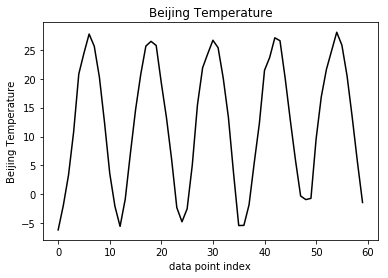

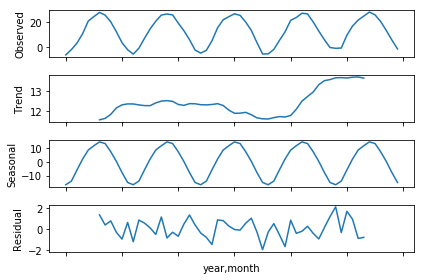

DEBUG::the size of test is:
(12,)
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=148.322, BIC=151.432, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=145.034, BIC=151.255, Fit time=0.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=148.863, BIC=153.529, Fit time=0.043 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=136.595, BIC=144.371, Fit time=0.952 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=137.590, BIC=143.812, Fit time=0.390 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=134.625, BIC=143.957, Fit time=0.798 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=

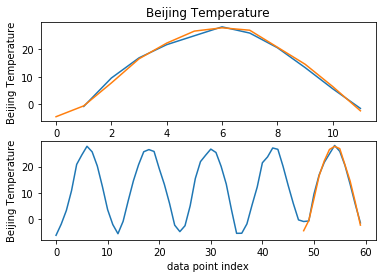

In [36]:
# plots and forecasting for Beijing weather data
plot_data(data_temp, "Beijing Temperature")
plot_seasonal(data_temp, 12)
# use 80% of data as training data
train_split = int(.8 * len(data_temp))
train = data_temp[:train_split]
test = data_temp[train_split:]
future_forecast_temp = future_forecast(train, test, True, 12)
plot_future_forecast(data_temp, test, future_forecast_temp, 'Beijing Temperature')

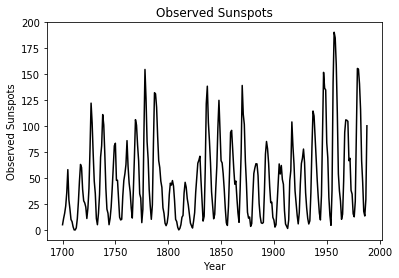

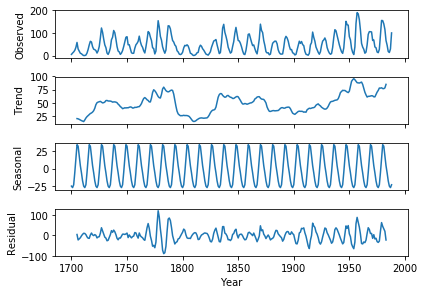

DEBUG::the size of test is:
(29,)
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 11); AIC=2133.165, BIC=2154.270, Fit time=1.912 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 11); AIC=2441.030, BIC=2448.065, Fit time=0.025 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 11); AIC=2213.351, BIC=2227.421, Fit time=0.767 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 11); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 11); AIC=2146.753, BIC=2164.340, Fit time=1.490 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 1, 11); AIC=2134.297, BIC=2158.920, Fit time=5.044 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 11); AIC=2166.159, BIC=2183.747, Fit time=1.301 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 11); AIC=2134.548, BIC=2159.170, Fit time=5.884 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 11); AIC=2194.465, BIC=2208.534, Fit time=0.274 seconds
Fit AR

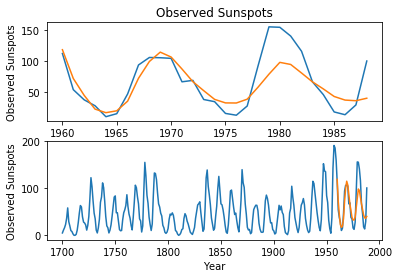

Root Mean Squared Error =  27.04555817703364
MIT RMSE = 30.9789


In [33]:
# plots and forecasting for sunspot data
from sklearn.metrics import mean_squared_error
import math
plot_data(data_sun, "Observed Sunspots")

# The solar cycle, which determines the number of observed sunspots has a period of 11 years
# (https://en.wikipedia.org/wiki/Solar_cycle). Therefore itps frequency (and its period for 
# seasonal differencing) is 11 years

# CONCLUSION -> period of seasonal differencing is very important, it's important for user to understand the
# periodicity of their time series for good prediction
plot_seasonal(data_sun, 11)

# use same training / testing splits as D3M prediction problem
train = data_sun[:260]
test = data_sun[260:]
future_forecast_sun = future_forecast(train, test, True, 11)
plot_future_forecast(data_sun, test, future_forecast_sun, 'Observed Sunspots')
print("Root Mean Squared Error = ", math.sqrt(mean_squared_error(test.values, future_forecast_sun)))
print("MIT RMSE = 30.9789")